<a href="https://colab.research.google.com/github/ZarAhmed/MyMLWork/blob/zareefaltaf/K_Means_Clustering_on_E_commerce_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans


In [ ]:
data  = pd.read_csv('/content/ecomerce.csv', delimiter=',', encoding='ISO-8859-1')
data.tail(15)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
188059,553013,23145,ZINC T-LIGHT HOLDER STAR LARGE,1,5/12/2011 18:19,2.08,NaN,United Kingdom
188060,553013,23163,REGENCY SUGAR TONGS,1,5/12/2011 18:19,4.96,NaN,United Kingdom
188061,553013,23170,REGENCY TEA PLATE ROSES,2,5/12/2011 18:19,3.29,NaN,United Kingdom
188062,553013,23171,REGENCY TEA PLATE GREEN,2,5/12/2011 18:19,3.29,NaN,United Kingdom
188063,553013,23172,REGENCY TEA PLATE PINK,2,5/12/2011 18:19,3.29,NaN,United Kingdom
188064,553013,23173,REGENCY TEAPOT ROSES,1,5/12/2011 18:19,19.96,NaN,United Kingdom
188065,553013,23174,REGENCY SUGAR BOWL GREEN,2,5/12/2011 18:19,8.29,NaN,United Kingdom
188066,553013,23175,REGENCY MILK JUG PINK,2,5/12/2011 18:19,7.46,NaN,United Kingdom
188067,553013,23191,BUNDLE OF 3 RETRO NOTE BOOKS,1,5/12/2011 18:19,3.29,NaN,United Kingdom
188068,553013,23199,JUMBO BAG APPLES,1,5/12/2011 18:19,4.13,NaN,United Kingdom


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188074 entries, 0 to 188073
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    188074 non-null  object 
 1   StockCode    188074 non-null  object 
 2   Description  187311 non-null  object 
 3   Quantity     188074 non-null  int64  
 4   InvoiceDate  188074 non-null  object 
 5   UnitPrice    188074 non-null  float64
 6   CustomerID   132166 non-null  float64
 7   Country      188074 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 11.5+ MB


In [ ]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,188074.000000,188074.000000,132166.000000
mean,9.202053,5.046372,15268.030454
std,247.886591,97.125476,1725.782678
min,-74215.000000,0.000000,12346.000000
25%,1.000000,1.250000,13819.000000
50%,3.000000,2.130000,15135.000000
75%,10.000000,4.210000,16791.750000
max,74215.000000,16888.020000,18283.000000


In [ ]:
data.describe(exclude=['int64','float64'])

,InvoiceNo,StockCode,Description,InvoiceDate,Country
count,188074,188074,187311,188074,188074
unique,9516,3482,3415,8566,36
top,537434,85123A,WHITE HANGING HEART T-LIGHT HOLDER,12/6/2010 16:57,United Kingdom
freq,675,1049,1067,675,173672


In [ ]:
data.shape

(188074, 8)

In [ ]:
data.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,763
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,55908
Country,0


In [ ]:
data.dropna(inplace=True)

In [ ]:
data.shape

(132166, 8)

Checking negative values in the data set


In [ ]:
data[data['Quantity']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
186923,C552889,20725,LUNCH BAG RED RETROSPOT,-1,5/12/2011 10:29,1.65,14606.0,United Kingdom
187022,C552919,21558,SKULL LUNCH BOX WITH CUTLERY,-1,5/12/2011 11:23,2.55,13282.0,United Kingdom
187023,C552936,22501,PICNIC BASKET WICKER LARGE,-6,5/12/2011 11:29,8.50,13113.0,United Kingdom
187024,C552944,21246,RED RETROSPOT BIG BOWL,-1,5/12/2011 11:40,4.95,17811.0,United Kingdom


Here the InvoiceNo having C means that the orders were rejected or not placed. Since they are not the part of our research, we will be dropping those negative values.

In [ ]:
data.drop(data[data['Quantity'] < 0].index, inplace = True)

In [ ]:
data.shape

(128942, 8)

**Here onwards we will be doing Data Preparation. **

Calculation of total amount or monetary value

In [ ]:
data['Total Sales'] = data['Quantity'] * data['UnitPrice']
new_data = data.groupby('CustomerID')['Total Sales'].sum().reset_index()
new_data

,CustomerID,Total Sales
0,12346.0,77183.60
1,12347.0,1823.43
2,12348.0,1487.24
3,12350.0,334.40
4,12352.0,1561.81
...,...,...
2567,18270.0,111.95
2568,18272.0,980.54
2569,18273.0,51.00
2570,18280.0,180.60


Calculating the number of transaction done by customer

In [ ]:
num_trans = data.groupby('CustomerID')['InvoiceNo'].count().reset_index()
num_trans.rename(columns={'InvoiceNo':'Number of Transactions'}, inplace = True)
num_trans

,CustomerID,Number of Transactions
0,12346.0,1
1,12347.0,84
2,12348.0,28
3,12350.0,17
4,12352.0,38
...,...,...
2567,18270.0,5
2568,18272.0,55
2569,18273.0,1
2570,18280.0,10


Calculating the last transaction

In [ ]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
data['Last Transaction'] = (data['InvoiceDate'].max() - data['InvoiceDate']).dt.days
# lt = data.groupby(['CustomerID', 'Country'])['Last Transaction'].max().reset_index()
# #Merging with Number of Transactions
# merge_table = pd.merge(lt, num_trans, how='inner', on='CustomerID')
# new_df = pd.merge(merge_table, new_data, how='inner', on='CustomerID')
# print(lt)
# print(new_df)
data['Last Transaction']

,Last Transaction
0,162
1,162
2,162
3,162
4,162
...,...
187909,0
187910,0
187911,0
187912,0


In [ ]:
lt = data.groupby(['CustomerID', 'Country'])['Last Transaction'].max().reset_index()


In [ ]:
merge_table = pd.merge(lt, num_trans, how='inner', on='CustomerID')
new_df = pd.merge(merge_table, new_data, how='inner', on='CustomerID')
new_df = pd.DataFrame(new_df)
new_df

,CustomerID,Country,Last Transaction,Number of Transactions,Total Sales
0,12346.0,United Kingdom,114,1,77183.60
1,12347.0,Iceland,156,84,1823.43
2,12348.0,Finland,146,28,1487.24
3,12350.0,Norway,99,17,334.40
4,12352.0,Norway,85,38,1561.81
...,...,...,...,...,...
2571,18270.0,United Kingdom,55,5,111.95
2572,18272.0,United Kingdom,35,55,980.54
2573,18273.0,United Kingdom,46,1,51.00
2574,18280.0,United Kingdom,66,10,180.60


In [ ]:

IQR = new_df['Total Sales'].quantile(0.75) - new_df['Total Sales'].quantile(0.25)
lower_limit = new_df['Total Sales'].quantile(0.25) - 1.5 * IQR
upper_limit = new_df['Total Sales'].quantile(0.75) + 1.5 * IQR
new_df_iqr = new_df[(new_df['Total Sales'] < upper_limit) & (new_df['Total Sales'] > lower_limit)]

new_df_iqr.shape



(2336, 5)

In [ ]:
new_df_iqr.reset_index(drop=True, inplace=True)
new_df_iqr

,CustomerID,Country,Last Transaction,Number of Transactions,Total Sales
0,12347.0,Iceland,156,84,1823.43
1,12348.0,Finland,146,28,1487.24
2,12350.0,Norway,99,17,334.40
3,12352.0,Norway,85,38,1561.81
4,12354.0,Spain,21,58,1079.40
...,...,...,...,...,...
2331,18270.0,United Kingdom,55,5,111.95
2332,18272.0,United Kingdom,35,55,980.54
2333,18273.0,United Kingdom,46,1,51.00
2334,18280.0,United Kingdom,66,10,180.60


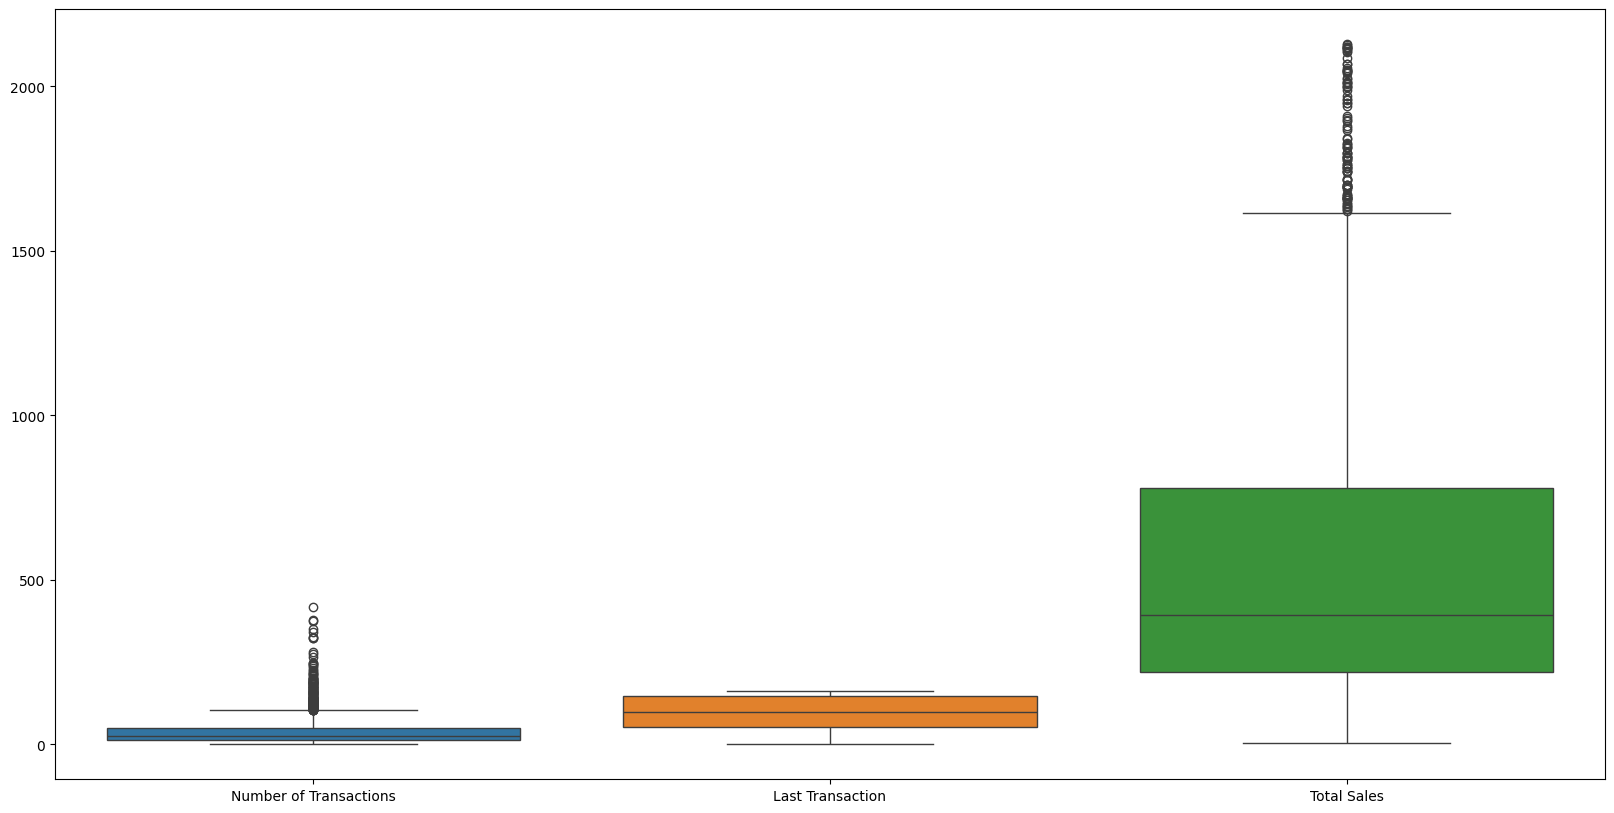

In [ ]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=new_df_iqr[['Number of Transactions', 'Last Transaction', 'Total Sales']])
plt.show()

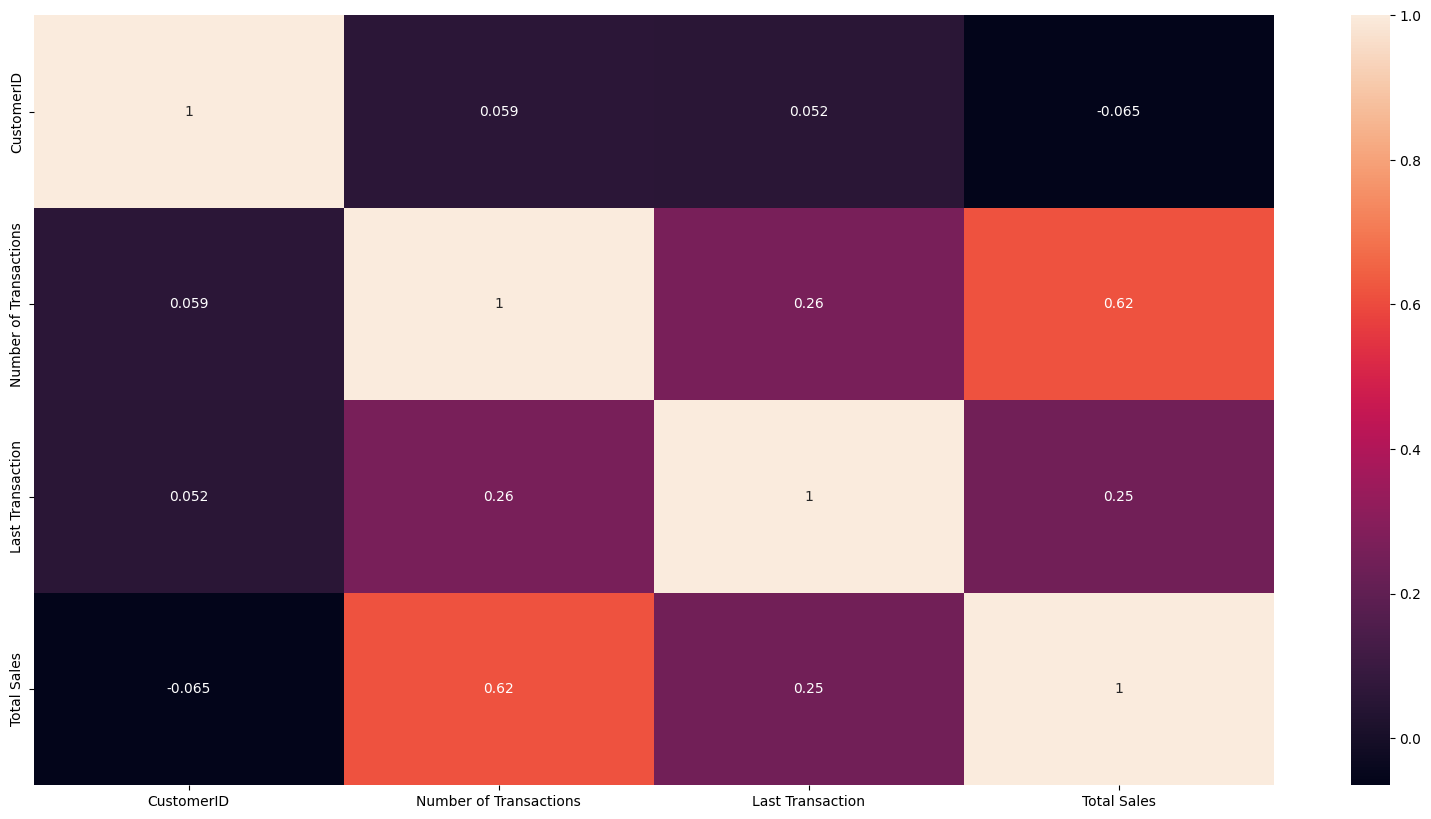

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(new_df_iqr[['CustomerID','Number of Transactions', 'Last Transaction', 'Total Sales']].corr(), annot=True)
plt.show()

Normalisation of the data set using MinMaxScaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
new2_df = new_df_iqr.drop('Country', axis=1)
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(new2_df)
scaled_df = pd.DataFrame(scaled_df)
scaled_df.columns = new2_df.columns
scaled_df['Country'] = new_df_iqr['Country']
scaled_df

,CustomerID,Last Transaction,Number of Transactions,Total Sales,Country
0,0.000000,0.962963,0.200000,0.856550,Iceland
1,0.000168,0.901235,0.065060,0.698300,Finland
2,0.000505,0.611111,0.038554,0.155642,Norway
3,0.000842,0.524691,0.089157,0.733401,Norway
4,0.001179,0.129630,0.137349,0.506324,Spain
...,...,...,...,...,...
2331,0.997810,0.339506,0.009639,0.050931,United Kingdom
2332,0.998147,0.216049,0.130120,0.459789,United Kingdom
2333,0.998315,0.283951,0.000000,0.022241,United Kingdom
2334,0.999495,0.407407,0.021687,0.083246,United Kingdom


 K-Means Clustering - Plotting the Graph using Elbow Method:


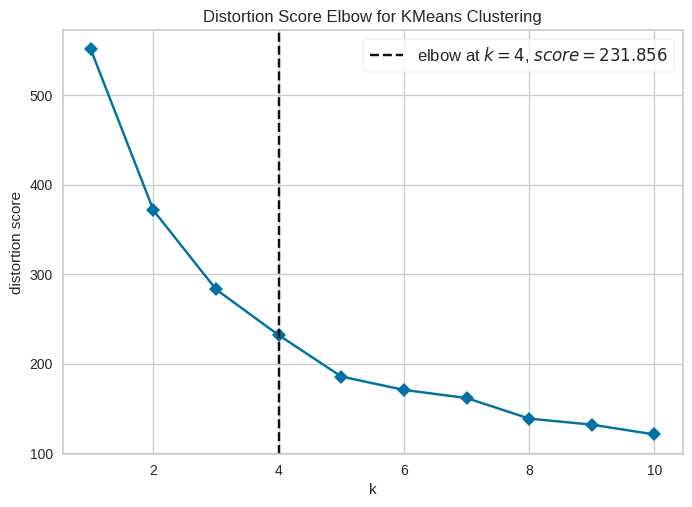

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
df_k = scaled_df.drop('Country', axis=1)

from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,11), timings=False)
visualizer.fit(df_k)
visualizer.show()

In [ ]:
km = KMeans(n_clusters=4)
y_pred = km.fit_predict(df_k)
df_k['Cluster'] = y_pred
df_k

,CustomerID,Last Transaction,Number of Transactions,Total Sales,Cluster
0,0.000000,0.962963,0.200000,0.856550,0
1,0.000168,0.901235,0.065060,0.698300,0
2,0.000505,0.611111,0.038554,0.155642,3
3,0.000842,0.524691,0.089157,0.733401,0
4,0.001179,0.129630,0.137349,0.506324,3
...,...,...,...,...,...
2331,0.997810,0.339506,0.009639,0.050931,2
2332,0.998147,0.216049,0.130120,0.459789,2
2333,0.998315,0.283951,0.000000,0.022241,2
2334,0.999495,0.407407,0.021687,0.083246,2


In [ ]:
km.cluster_centers_

array([[0.40678742, 0.81653625, 0.2134804 , 0.64487754],
       [0.68474462, 0.86881052, 0.08601184, 0.20578067],
       [0.70577762, 0.27766808, 0.05778072, 0.18384662],
       [0.21155273, 0.46143058, 0.0559658 , 0.19442787]])

Model Evaluation
Silhouette score is calculated to evaluate the performance of the K-Means clustering model.

The silhouette score measures the compactness of clusters and ranges from -1 to 1, with higher scores indicating better clustering.

Hierarchical clustering using AgglomerativeClustering is performed with 3 clusters, and cluster assignments are added to the DataFrame.



In [ ]:
from sklearn.metrics import silhouette_score,silhouette_samples
score = silhouette_score(df_k, km.labels_, metric='euclidean')
print(score)

0.6607077906339609


Here km.labels_ refers to the custers in the dataset.
Since the value is near to +1, its a good cluster(no overlapping)

Here we will try another algorithm to check its performance

In [ ]:
from sklearn.cluster import DBSCAN
model_dbscan = DBSCAN()
y_pred_dbscan = model_dbscan.fit_predict(df_k)
df_k['Cluster_dbscan'] = y_pred_dbscan
df_k

,CustomerID,Last Transaction,Number of Transactions,Total Sales,Cluster,Cluster_dbscan
0,0.000000,0.962963,0.200000,0.856550,0,0
1,0.000168,0.901235,0.065060,0.698300,0,0
2,0.000505,0.611111,0.038554,0.155642,3,1
3,0.000842,0.524691,0.089157,0.733401,0,0
4,0.001179,0.129630,0.137349,0.506324,3,1
...,...,...,...,...,...,...
2331,0.997810,0.339506,0.009639,0.050931,2,3
2332,0.998147,0.216049,0.130120,0.459789,2,3
2333,0.998315,0.283951,0.000000,0.022241,2,3
2334,0.999495,0.407407,0.021687,0.083246,2,3


In [ ]:
score_dbscan = silhouette_score(df_k, model_dbscan.labels_, metric='euclidean')
print(score_dbscan)

0.7844256503755709


Here DBSCAN performs better than KMeans